In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv


In [2]:
# Load Data
filepath = '/kaggle/input/unsw-nb15/'

train = pd.read_csv(os.path.join(filepath, 'UNSW_NB15_training-set.csv'),index_col = 0)
test = pd.read_csv(os.path.join(filepath, 'UNSW_NB15_testing-set.csv'),index_col = 0)

In [3]:
# Define columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
print(num_cols)
print(cat_cols)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']
['proto', 'service', 'state', 'attack_cat']


In [4]:
uniques = {}

for column in train.columns:
    uniques[column] = train[column].unique().tolist()
    if column  in cat_cols:
        print(uniques[column])

print(f"train shape :{train.shape}")

['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip', 'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2', 'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6', 'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd', 'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts', 'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn', 'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna', 'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep', 'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip', 'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer', 'ipx-n-ip', 'pgm', 'vrrp', 'l2tp

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Lista para armazenar o mapeamento das classes para cada coluna categórica, exceto 'attack'
label_encoder_mappings = {}

for col in cat_cols:
        train[col] = le.fit_transform(train[col])
        test[col] = le.fit_transform(test[col])  # Use transform em vez de fit_transform no conjunto de teste
        
        # Armazenar o mapeamento das classes no dicionário
        label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
print(f"train shape :{train.shape}")
print(f"test shape :{test.shape}")

train shape :(82332, 44)
test shape :(175341, 44)


In [7]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    display(set_frame_style(data[cols].isnull().sum().to_frame().transpose(), f'{title}:Columns With Null'))
    
    
check_data(train, 'Train data')
print('-'*100)
check_data(test, 'Test data')
print('-'*100)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,117,0,4,2,0,496,0,90909.090200,254,0,180363632.000000,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
2,0.000008,117,0,4,2,0,1762,0,125000.000300,254,0,881000000.000000,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
3,0.000005,117,0,4,2,0,1068,0,200000.005100,254,0,854400000.000000,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,6,0
4,0.000006,117,0,4,2,0,900,0,166666.660800,254,0,600000000.000000,0.000000,0,0,0.006000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0
5,0.000010,117,0,4,2,0,2126,0,100000.002500,254,0,850400000.000000,0.000000,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,109.348273,1.421695,3.374751,18.666472,17.545936,7993.908165,13233.785563,82410.886739,180.967667,95.713003,64549016.914059,630546.959000,4.753692,6.308556,755.394301,121.701284,6363.075100,535.180430,133.459080,1084641551.115289,1073464670.880387,128.286620,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1595.371885,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,4.987757,0.550600
std,4.710444,18.637282,2.108083,0.670372,133.916353,115.574086,171642.261880,151471.456091,148620.367041,101.513358,116.667722,179861832.630003,2393000.555646,64.649620,55.708021,6182.615732,1292.378499,56724.016689,3635.305383,127.357000,1390859761.610447,1381996192.032797,127.491370,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,38066.972292,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,1.431541,0.497436
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000008,111.000000,0.000000,3.000000,2.000000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,11202.466797,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,4.000000,0.000000
50%,0.014138,111.000000,0.000000,3.000000,6.000000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,577003.218750,2112.951416,1.000000,0.000000,0.557929,0.010000,17.623918,0.000000,255.000000,27888855.000000,28569748.500000,255.000000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,5.000000,1.000000
75%,0.719360,117.000000,2.000000,4.000000,12.000000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,65142856.000000,15858.082275,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.000000,2171309606.500000,2144205173.000000,255.000000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,6.000000,1.000000
max,59.999989,130.000000,12.000000,6.000000,10646.000000,11018.000000,14355774.000000,14657531.000000,1000000.003000,255.000000,253.000000,5268000256.000000,20821108.000000,5319.000000,5507.000000,60009.992000,57739.240000,1483830.917000,463199.240100,255.000000,4294949667.000000,4294880717.000000,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
Unique Value Count,39888,131,13,7,420,436,4489,4034,40616,11,8,42873,40614,253,311,39970,37617,39944,38381,11,39219,39108,14,26130,24934,24020,1282,1222,8,1190,57,7,50,50,33,57,3,3,8,50,57,2,10,2


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,113,0,2,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,6,0
2,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,6,0
3,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,6,0
4,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,6,0
5,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,6,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,109.606675,1.618920,2.355176,20.298664,18.969591,8844.843836,14928.918564,95406.187105,179.546997,79.609567,73454033.194063,671205.574188,4.953000,6.948010,985.976864,88.216296,4976.254226,604.353826,116.257339,969250421.910511,968877027.071153,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2144.291655,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,4.670100,0.680622
std,6.480249,22.352601,2.305151,0.867942,136.887597,110.258271,174765.644309,143654.217718,165400.978457,102.940011,110.506863,188357447.000203,2421312.388757,66.005059,52.732999,7242.245841,987.093195,44965.846519,4061.043281,127.001024,1355264249.263036,1353999546.225652,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,54207.967294,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,1.568238,0.466237
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000008,113.000000,0.000000,2.000000,2.000000,0.000000,114.000000,0.000000,32.786140,62.000000,0.000000,13053.338870,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000
50%,0.001582,113.000000,0.000000,2.000000,2.000000,2.000000,430.000000,164.000000,3225.806520,254.000000,29.000000,879674.750000,1447.022705,0.000000,0.000000,0.279733,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,5.000000,1.000000
75%,0.668069,119.000000,2.000000,3.000000,12.000000,10.000000,1418.000000,1102.000000,125000.000300,254.000000,252.000000,88888888.000000,27844.871090,3.000000,2.000000,55.156896,51.053000,2513.295019,114.990625,255.000000,1916651334.000000,1913674673.000000,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,6.000000,1.000000
max,59.999989,132.000000,12.000000,8.000000,9616.000000,10974.000000,12965233.000000,14655550.000000,1000000.003000,255.000000,254.000000,5988000256.000000,22422730.000000,4803.000000,5484.000000,84371.496000,56716.824000,1460480.016000,289388.269700,255.000000,4294958913.000000,4294881924.000000,255.000000,2.518893,2.100352,1.520884,1504.000000,

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
Unique Value Count,74039,133,13,9,480,443,7214,6660,76991,11,6,80885,77474,409,370,76161,74245,77532,76831,13,75265,75089,7,43319,40142,37708,1357,1328,11,2386,52,5,50,47,32,54,4,4,11,50,52,2,10,2


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


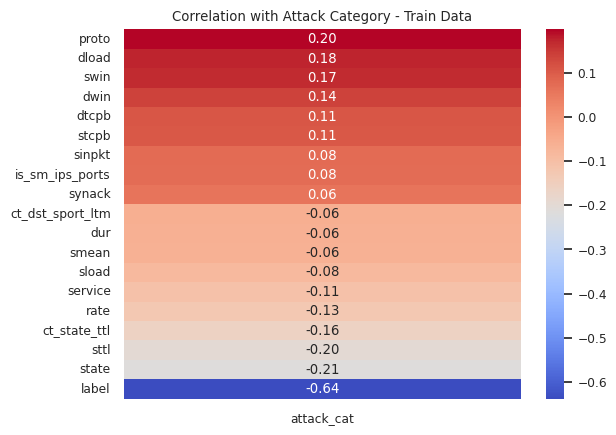

Quantidade: 24
['tcprtt', 'dmean', 'ct_dst_ltm', 'ackdat', 'dinpkt', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'sjit', 'ct_srv_src', 'ct_srv_dst', 'dpkts', 'response_body_len', 'dloss', 'dbytes', 'djit', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_ftp_cmd', 'spkts', 'is_ftp_login', 'trans_depth', 'sloss', 'dttl', 'sbytes']


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


corr = train.corr(numeric_only=True)
target_corr = corr['attack_cat'].drop('attack_cat')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Selecionar as features com valores de correlação maiores que 0.05 em módulo
target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]

# Criar uma lista com os nomes das features com valores menores que 0.05 em módulo
low_corr_features = target_corr_sorted[abs(target_corr_sorted) < 0.05].index.tolist()


# Plotar o heatmap com as features selecionadas
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Attack Category - Train Data')
plt.show()

# Printar o nome das features com valores menores que 0.1
print(f"Quantidade: {len(low_corr_features)}")
print(low_corr_features)

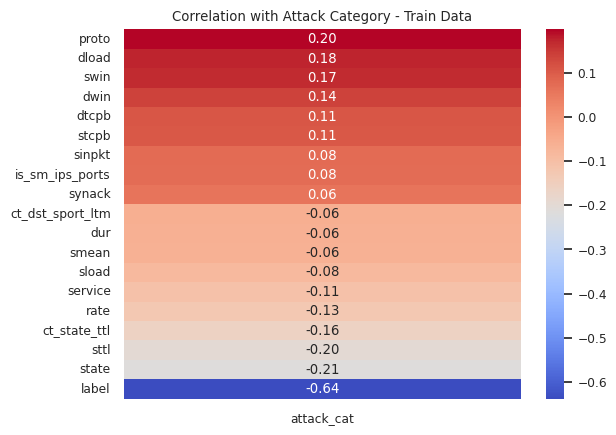

Features com correlação menor a 0.05:
Quantidade: 24
['tcprtt', 'dmean', 'ct_dst_ltm', 'ackdat', 'dinpkt', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'sjit', 'ct_srv_src', 'ct_srv_dst', 'dpkts', 'response_body_len', 'dloss', 'dbytes', 'djit', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_ftp_cmd', 'spkts', 'is_ftp_login', 'trans_depth', 'sloss', 'dttl', 'sbytes']


In [9]:
corr = train.corr(numeric_only=True)
target_corr = corr['attack_cat'].drop('attack_cat')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Selecionar as features com valores de correlação maiores que 0.05 em módulo
target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]

# Criar uma lista com os nomes das features com valores menores que 0.05 em módulo
low_corr_features = target_corr_sorted[abs(target_corr_sorted) < 0.05].index.tolist()


# Plotar o heatmap com as features selecionadas
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Attack Category - Train Data')
plt.show()

# Printar o nome das features com valores menores que 0.1
print("Features com correlação menor a 0.05:")
print(f"Quantidade: {len(low_corr_features)}")
print(low_corr_features)


In [10]:
# Calcular a entropia do conjunto de dados 'train'
def entropy(data):
    class_column = 'attack_cat'  # Coluna que representa a classe (target)
    counts = data[class_column].value_counts()
    total_samples = len(data)
    entropy_val = -np.sum([(count / total_samples) * np.log2(count / total_samples) for count in counts])
    return entropy_val

# Calcular a entropia para cada feature individual no conjunto de dados 'train'
def feature_entropy(data, feature):
    class_column = 'attack_cat'  # Coluna que representa a classe (target)
    values = data[feature].unique()
    feature_entropy_val = 0
    for value in values:
        subset = data[data[feature] == value]
        subset_size = len(subset)
        subset_entropy = entropy(subset)
        feature_entropy_val += (subset_size / len(data)) * subset_entropy
    return feature_entropy_val

# Calcular o Information Gain para cada feature
def information_gain(data, feature):
    dataset_entropy = entropy(data)
    feature_entropy_val = feature_entropy(data, feature)
    information_gain_val = dataset_entropy - feature_entropy_val
    return information_gain_val

# Selecionar as 13 features com os maiores valores de Information Gain
def select_features_by_information_gain(data, num_features):
    information_gains = {}
    for feature in data.columns:
        if feature != 'attack_cat':  # Não considerar a coluna de classe como feature
            information_gain_val = information_gain(data, feature)
            information_gains[feature] = information_gain_val

    # Ordenar as features pelo valor do Information Gain em ordem decrescente
    sorted_features = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)

    # Selecionar as num_features com os maiores valores de Information Gain
    selected_features = [feature for feature, _ in sorted_features[:num_features]]
    return selected_features


In [11]:
# Reduzir o DataFrame 'train' mantendo apenas as 22 features selecionadas
selected_features = select_features_by_information_gain(train, num_features=22)
train_reduced = train[selected_features]

# Reduzir o DataFrame 'test' mantendo apenas as 22 features selecionadas
test_reduced = test[selected_features]

# Adicionar a coluna target ('attack_cat') de volta aos DataFrames reduzidos
train_reduced['attack_cat'] = train['attack_cat']
test_reduced['attack_cat'] = test['attack_cat']

# Obter a lista de todas as features do DataFrame 'train'
all_features = train.columns.tolist()

# Remover a coluna 'attack_cat' da lista de todas as features
all_features.remove('attack_cat')

# Obter a lista de features não selecionadas
non_selected_features = [feature for feature in all_features if feature not in selected_features]

/tmp/ipykernel_21/3316561467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_reduced['attack_cat'] = train['attack_cat']
/tmp/ipykernel_21/3316561467.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_reduced['attack_cat'] = test['attack_cat']


In [12]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    display(set_frame_style(data[cols].isnull().sum().to_frame().transpose(), f'{title}:Columns With Null'))
    
    
check_data(train_reduced, 'Train data')
print('-'*100)
check_data(test_reduced, 'Test data')
print('-'*100)

,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
id,,,,,,,,,,,,,,,,,,,,,,,
1,180363632.000000,496,0.000011,90909.090200,0.011000,0.000000,0.000000,248,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,117,2,6
2,881000000.000000,1762,0.000008,125000.000300,0.008000,0.000000,0.000000,881,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,117,2,6
3,854400000.000000,1068,0.000005,200000.005100,0.005000,0.000000,0.000000,534,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,117,2,6
4,600000000.000000,900,0.000006,166666.660800,0.006000,0.000000,0.000000,450,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,117,2,6
5,850400000.000000,2126,0.000010,100000.002500,0.010000,0.000000,0.000000,1063,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,117,2,6


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,64549016.914059,7993.908165,1.006756,82410.886739,755.394301,630546.959000,121.701284,139.528604,6363.075100,1084641551.115289,1073464670.880387,535.180430,0.055925,0.029256,0.026669,0.550600,13233.785563,116.275069,1.421695,3.663011,109.348273,1.369273,4.987757
std,179861832.630003,171642.261880,4.710444,148620.367041,6182.615732,2393000.555646,1292.378499,208.472063,56724.016689,1390859761.610447,1381996192.032797,3635.305383,0.116022,0.070854,0.055094,0.497436,151471.456091,244.600271,2.108083,5.915386,18.637282,1.067188,1.431541
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11202.466797,114.000000,0.000008,28.606114,0.008000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,111.000000,1.000000,4.000000
50%,577003.218750,534.000000,0.014138,2650.176667,0.557929,2112.951416,0.010000,65.000000,17.623918,27888855.000000,28569748.500000,0.000000,0.000551,0.000441,0.000080,1.000000,178.000000,44.000000,0.000000,1.000000,111.000000,1.000000,5.000000
75%,65142856.000000,1280.000000,0.719360,111111.107200,63.409444,15858.082275,63.136369,100.000000,3219.332412,2171309606.500000,2144205173.000000,128.459914,0.105541,0.052596,0.048816,1.000000,956.000000,87.000000,2.000000,3.000000,117.000000,2.000000,6.000000
max,5268000256.000000,14355774.000000,59.999989,1000000.003000,60009.992000,20821108.000000,57739.240000,1504.000000,1483830.917000,4294949667.000000,4294880717.000000,463199.240100,3.821465,3.226788,2.928778,1.000000,14657531.000000,1500.000000,12.000000,38.000000,130.000000,6.000000,9.000000


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
Unique Value Count,42873,4489,39888,40616,39970,40614,37617,1282,39944,39219,39108,38381,26130,24934,24020,2,4034,1222,13,33,131,7,10


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
id,,,,,,,,,,,,,,,,,,,,,,,
1,14158.942380,258,0.121478,74.087490,24.295600,8495.365234,8.375000,43,30.177547,621772692,2202533631,11.830604,0.000000,0.000000,0.000000,0,172,43,0,1,113,0,6
2,8395.112305,734,0.649902,78.473372,49.915000,503571.312500,15.432865,52,61.426934,1417884146,3077387971,1387.778330,0.000000,0.000000,0.000000,0,42014,1106,0,1,113,1,6
3,1572.271851,364,1.623129,14.170161,231.875571,60929.230470,102.737203,46,17179.586860,2116150707,2963114973,11420.926230,0.111897,0.061458,0.050439,0,13186,824,0,1,113,1,6
4,2740.178955,628,1.681642,13.677108,152.876547,3358.622070,90.235726,52,259.080172,1107119177,1047442890,4991.784669,0.000000,0.000000,0.000000,0,770,64,3,1,113,1,6
5,8561.499023,534,0.449454,33.373826,47.750333,3987.059814,75.659602,53,2415.837634,2436137549,1977154190,115.807000,0.128381,0.071147,0.057234,0,268,45,0,1,113,1,6


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,73454033.194063,8844.843836,1.359389,95406.187105,985.976864,671205.574188,88.216296,136.751769,4976.254226,969250421.910511,968877027.071153,604.353826,0.041396,0.021020,0.020375,0.680622,14928.918564,124.173382,1.618920,4.206255,109.606675,1.304179,4.670100
std,188357447.000203,174765.644309,6.480249,165400.978457,7242.245841,2421312.388757,987.093195,204.677360,44965.846519,1355264249.263036,1353999546.225652,4061.043281,0.079354,0.043400,0.040506,0.466237,143654.217718,258.317056,2.305151,5.783585,22.352601,0.954406,1.568238
min,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,13053.338870,114.000000,0.000008,32.786140,0.008000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,113.000000,1.000000,3.000000
50%,879674.750000,430.000000,0.001582,3225.806520,0.279733,1447.022705,0.006000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,164.000000,44.000000,0.000000,1.000000,113.000000,1.000000,5.000000
75%,88888888.000000,1418.000000,0.668069,125000.000300,55.156896,27844.871090,51.053000,100.000000,2513.295019,1916651334.000000,1913674673.000000,114.990625,0.065481,0.023268,0.038906,1.000000,1102.000000,89.000000,2.000000,3.000000,119.000000,2.000000,6.000000
max,5988000256.000000,12965233.000000,59.999989,1000000.003000,84371.496000,22422730.000000,56716.824000,1504.000000,1460480.016000,4294958913.000000,4294881924.000000,289388.269700,2.518893,2.100352,1.520884,1.000000,14655550.000000,1458.000000,12.000000,46.000000,132.000000,6.000000,9.000000


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
Unique Value Count,80885,7214,74039,76991,76161,77474,74245,1357,77532,75265,75089,76831,43319,40142,37708,2,6660,1328,13,32,133,5,10


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,sload,sbytes,dur,rate,sinpkt,dload,dinpkt,smean,sjit,stcpb,dtcpb,djit,tcprtt,synack,ackdat,label,dbytes,dmean,service,ct_dst_sport_ltm,proto,ct_state_ttl,attack_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


In [13]:
non_selected_features_article = ['Srcip', 'Sport', 'Dstip', 'Dstport', 'State', 'Sload', 'Dload', 'Swin', 'Dwin', 'Stcpb',
                            'Dtcpb', 'Trans_depth', 'Res_bdy_len', 'Djit', 'Stime', 'Ltime', 'Sinpkt', 'Tcprtt', 'Synack',
                            'Ackdat', 'Is_sm_ips_parts', 'Ct_ftw_http_mthd', 'Is_ftp_login', 'Ct_ftp_cmd',
                            'Ct_src_ltm']

non_selected_features_article = [feature.lower() for feature in non_selected_features_article]

selected_features_article = ['Ct_dst_ltm', 'Ct_dst_sport_ltm', 'Ct_dst_src_ltm', 'Ct_src_dport_ltm', 'Ct_srv_dst',
                                 'Ct_srv_src', 'Ct_state_ttl', 'Dbytes', 'Dinpkt', 'Dloss', 'Dmeanz', 'Dpkts', 'Dttl',
                                 'Dur', 'Proto', 'Sbytes', 'Service', 'Sjit', 'Sloss', 'Smeanz', 'spkts', 'Sttl']


selected_features_article = [feature.lower() for feature in selected_features_article]


In [14]:
# Verificar quais features estão presentes no non_selected_features_article
common_features = set(non_selected_features) & set(non_selected_features_article)
num_common_features = len(common_features)

# Imprimir as features comuns e a quantidade
print("Features comuns:")
print(common_features)
print(f"Quantidade: {num_common_features}")


Features comuns:
{'trans_depth', 'swin', 'dwin', 'ct_src_ltm', 'is_ftp_login', 'state', 'ct_ftp_cmd'}
Quantidade: 7


In [15]:
# Verificar quais features estão presentes no selected_features_article
common_features = set(selected_features) & set(selected_features_article)
num_common_features = len(common_features)

# Imprimir as features comuns e a quantidade
print("Features comuns:")
print(common_features)
print(f"Quantidade: {num_common_features}")


Features comuns:
{'dinpkt', 'proto', 'ct_state_ttl', 'sjit', 'service', 'sbytes', 'dur', 'dbytes', 'ct_dst_sport_ltm'}
Quantidade: 9


In [16]:
print("Analysis")
print(len(selected_features))
print(len(non_selected_features))
print("Article")
print(len(selected_features_article))
print(len(non_selected_features_article))


Analysis
22
21
Article
22
25


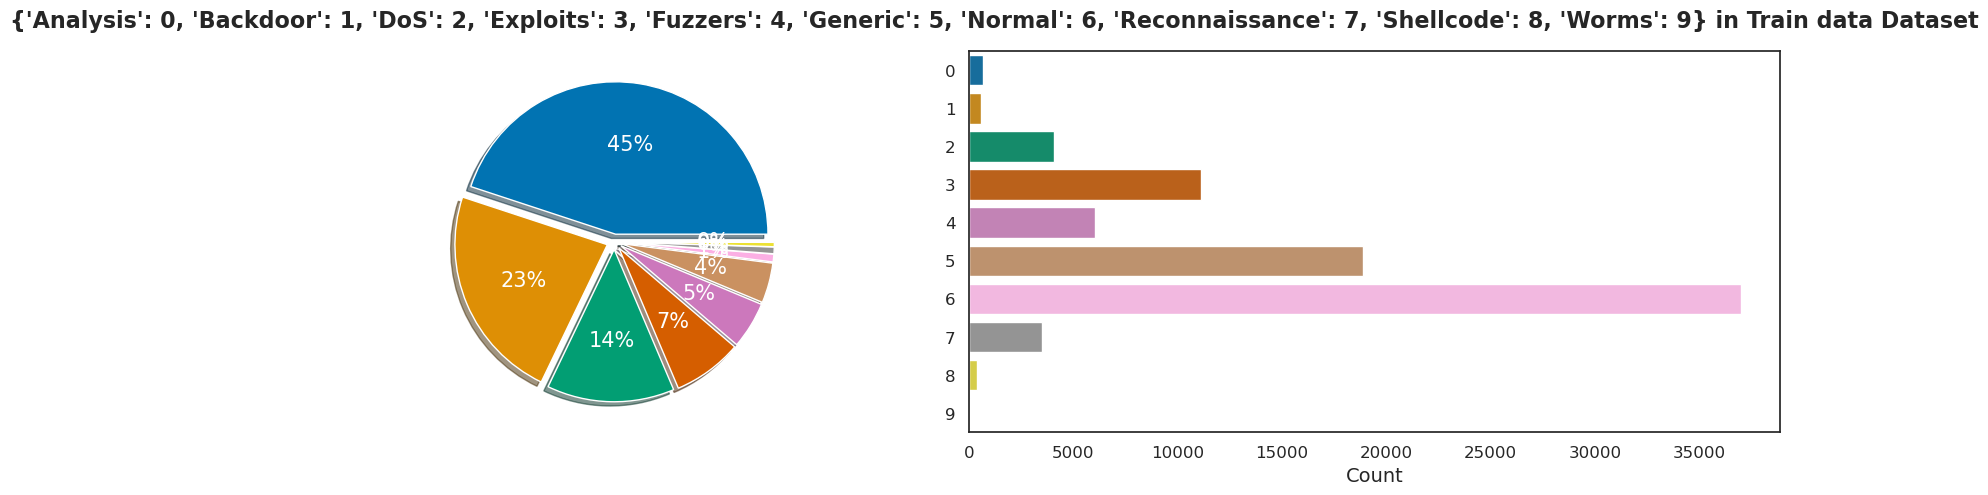

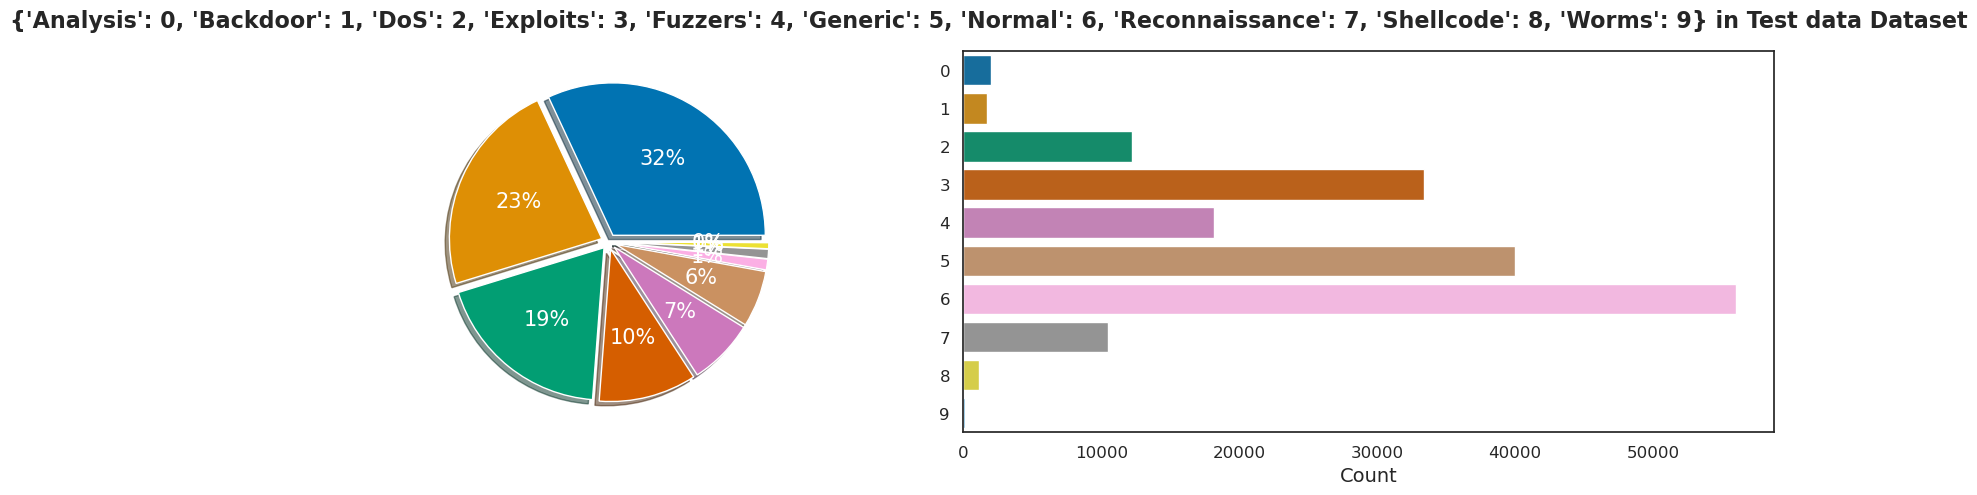

In [17]:
def plot_target_feature(df, target_col, label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train'):
    df = df.fillna('Nan')
    df = df.sort_values(target_col)

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df[target_col].unique()))
    ax[0].pie(
        df[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    target_col_label = label_encoder_mappings[target_col]
    fig.suptitle(f'{target_col_label} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Usando o label_encoder_mappings para criar o gráfico
plot_target_feature(train_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(test_reduced, 'attack_cat', label_encoder_mappings, figsize=(16,5), palette='colorblind', name='Test data')


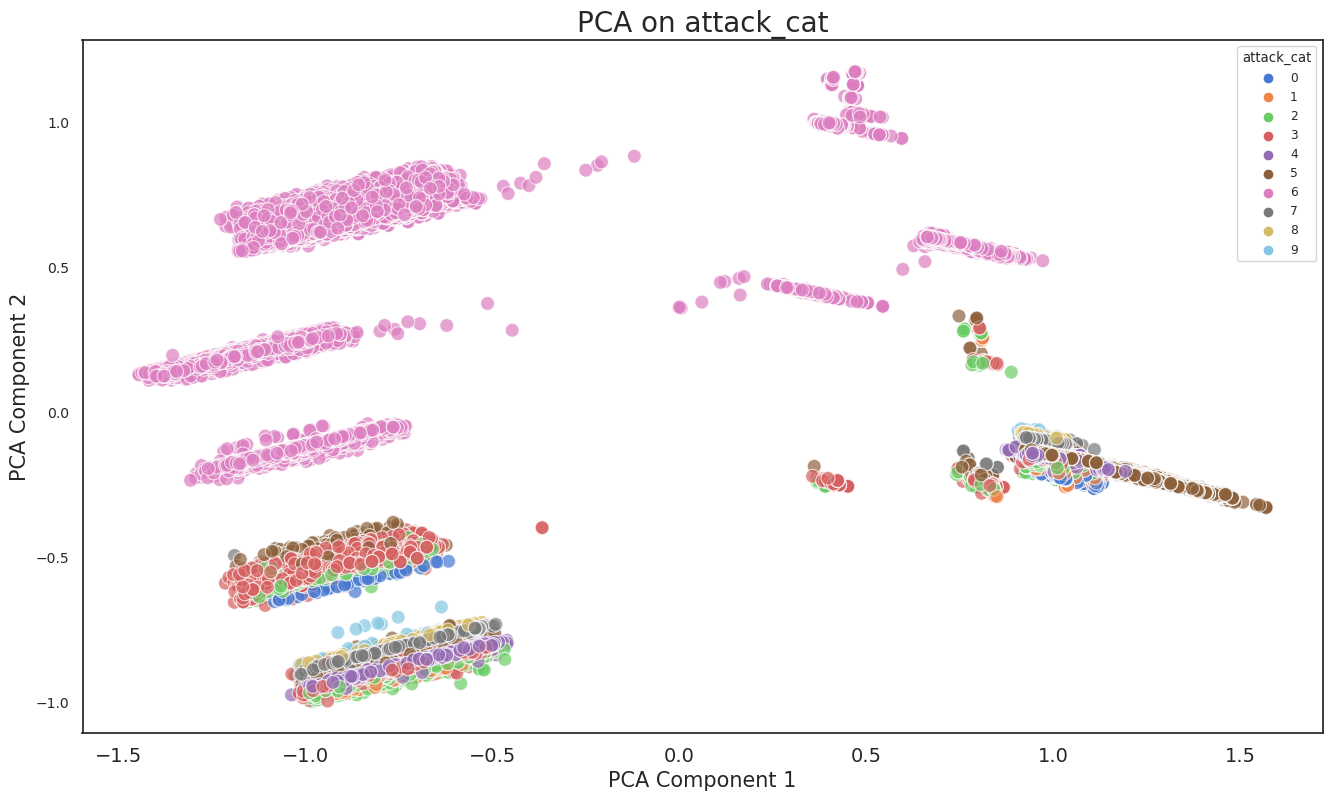

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        
    def dimension_reduction(self, df):
            
        X_reduced = self.dimension_method(df)
        df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def dimension_method(self, df):
        
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "umap":
            comp = UMAP(n_components=self.n_components, random_state=0)
            X_reduced = comp.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
        else:
            raise ValueError(f"Invalid method name: {method}")
        
        return X_reduced
    
    def scaler(self, df):
        
        _df = df.copy()
            
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")
        
    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]
    
    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)
    
    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        
        return df_comp
    
    def decomp_plot(self, tmp, label, hue='genre'):
        plt.figure(figsize = (16, 9))
        sns.scatterplot(x = f"{label}_0", y = f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='muted');

        plt.title(f'{label} on {hue}', fontsize = 20)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 10);
        plt.xlabel(f"{label} Component 1", fontsize = 15)
        plt.ylabel(f"{label} Component 2", fontsize = 15)
    
    
data = train.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data

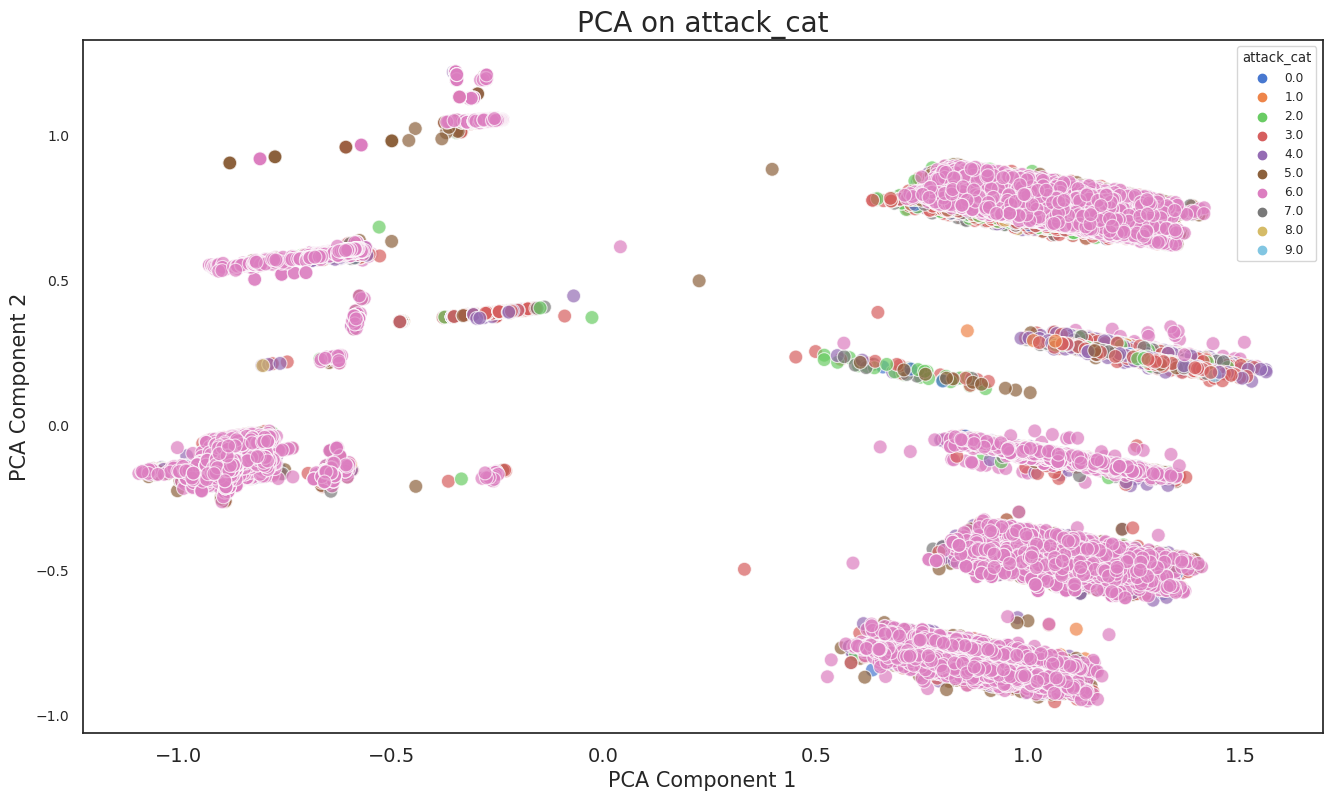

In [19]:
data = test.copy()
method = 'pca'

decomp = Decomp(n_components=2, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_reduced['attack_cat'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'attack_cat')
    
del data